In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [109]:
df=pd.read_csv("Student_Performance.csv")

In [113]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [115]:
df.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0


In [117]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [129]:
df.corr(numeric_only=True)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


<Axes: >

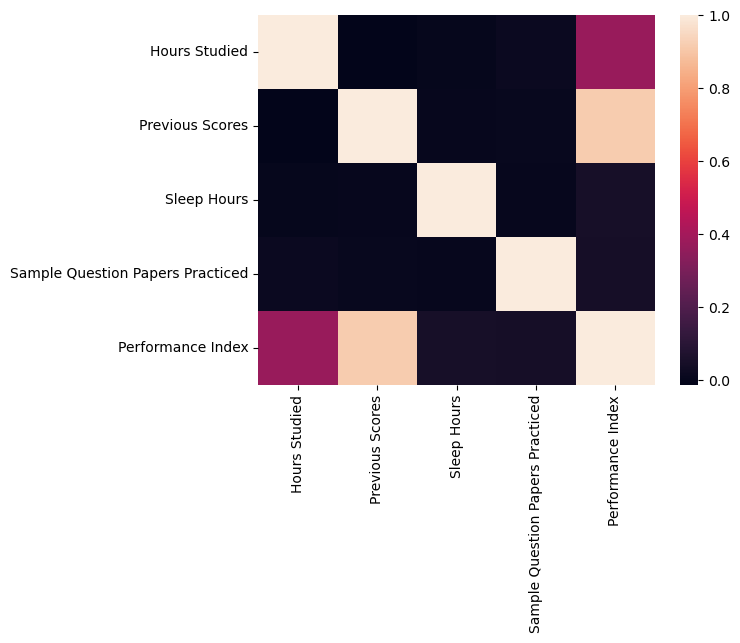

In [133]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True))

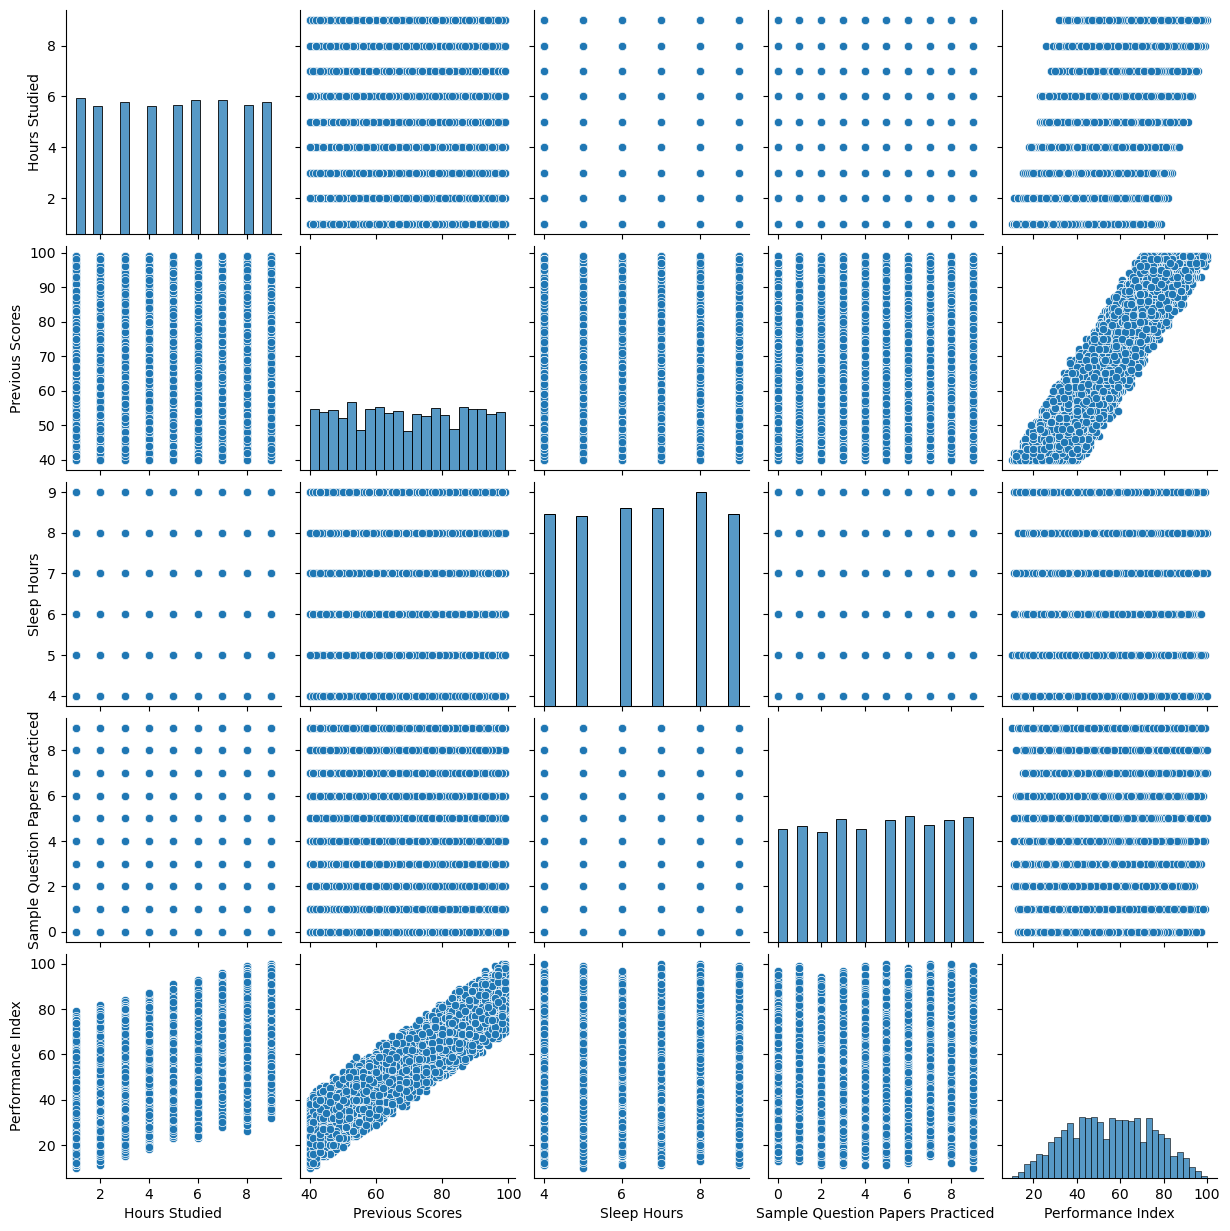

In [135]:
sns.pairplot(data=df)

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

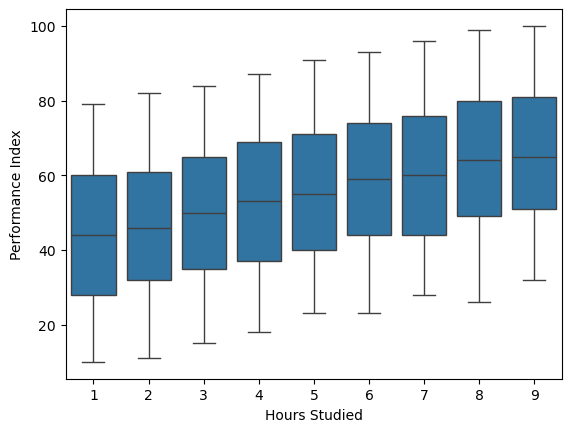

In [137]:
sns.boxplot(data=df, x=df["Hours Studied"],y=df["Performance Index"])

C:\Users\erzub\AppData\Local\Temp\ipykernel_6012\3497166745.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bins=10,hist=True,kde=True,x=df["Hours Studied"])


<Axes: ylabel='Density'>

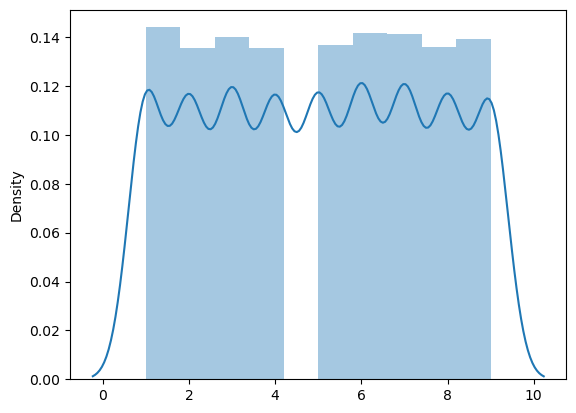

In [141]:
sns.distplot(bins=10,hist=True,kde=True,x=df["Hours Studied"])

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

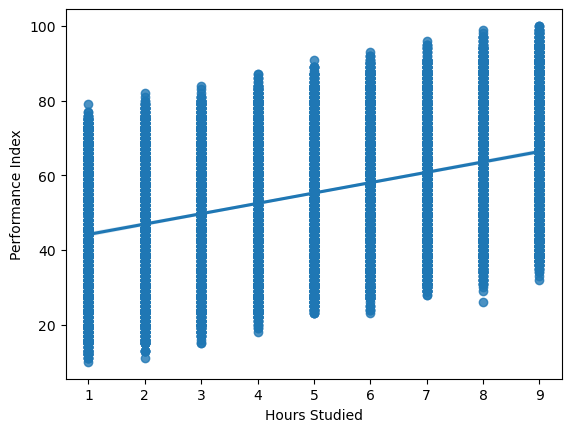

In [143]:
sns.regplot(data=df,x=df["Hours Studied"],y=df["Performance Index"])

In [73]:
from sklearn.preprocessing import OneHotEncoder
df=pd.get_dummies(df,columns=["Extracurricular Activities"],drop_first=True)

In [75]:
df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,True
1,4,82,4,2,65.0,False
2,8,51,7,2,45.0,True
3,5,52,5,2,36.0,True
4,7,75,8,5,66.0,False
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,True
9996,7,64,8,5,58.0,True
9997,6,83,8,5,74.0,True
9998,9,97,7,0,95.0,True


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular Activities_Yes    10000 non-null  bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 400.5 KB


In [81]:
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

In [84]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,7,99,9,1,True
1,4,82,4,2,False
2,8,51,7,2,True
3,5,52,5,2,True
4,7,75,8,5,False
...,...,...,...,...,...
9995,1,49,4,2,True
9996,7,64,8,5,True
9997,6,83,8,5,True
9998,9,97,7,0,True


In [86]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [92]:
y_pred = model.predict(X_test)

In [94]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [96]:
mse

4.082628398521854

In [98]:
r2

0.9889832909573145

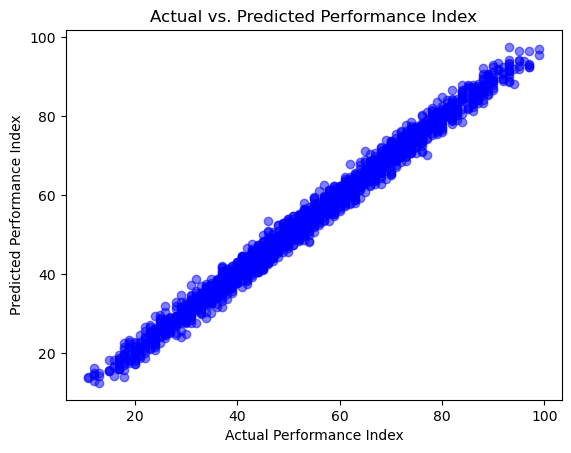

In [105]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance Index")
plt.show()

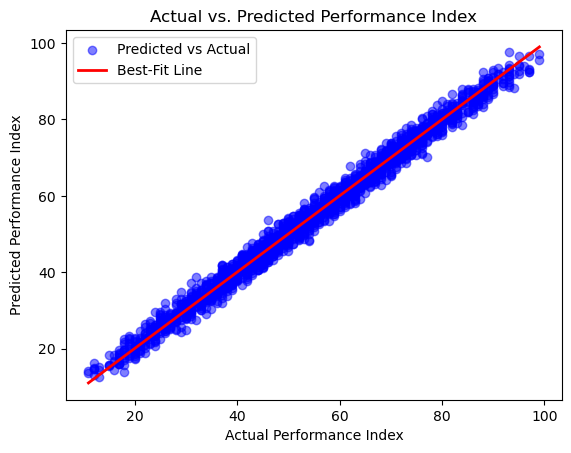

In [147]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linewidth=2, label="Best-Fit Line")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs. Predicted Performance Index")
plt.legend()
plt.show()
